In [3]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (18.0)


In [2]:
!pip install ffmpeg-python
!pip install moviepy

  Using cached https://files.pythonhosted.org/packages/c7/e0/52b2faaef4fd87f86eb8a8f1afa2cd6eb11146822033e29c04ac48ada32c/tqdm-4.25.0-py2.py3-none-any.whl


In [3]:
!pip install -r requirements.txt

  Using cached https://files.pythonhosted.org/packages/a8/d7/db2e9773cddb88da3db1eb097238b91169535255c64529fdd6ff18653dbe/ruamel.yaml-0.15.61-cp36-cp36m-manylinux1_x86_64.whl


In [22]:
!pip install virtualenv

  Using cached https://files.pythonhosted.org/packages/b6/30/96a02b2287098b23b875bc8c2f58071c35d2efe84f747b64d523721dc2b5/virtualenv-16.0.0-py2.py3-none-any.whl


In [20]:
import subprocess
subprocess.call(['pip', 'install', '-e', 'git+https://github.com/informatics-lab#egg=lenny'])

1

In [21]:
! pip install https://github.com/informatics-lab/lenny/blob/master/lenny.py

     \ 225kB 101.2MB/s
  Cannot unpack file /tmp/pip-unpack-m1wrjiiv/lenny.py (downloaded from /tmp/pip-req-build-pxlcnnt_, content-type: text/html; charset=utf-8); cannot detect archive format
Cannot determine archive format of /tmp/pip-req-build-pxlcnnt_


In [23]:
!pip install git+https://github.com/informatics-lab/lenny#egg=lenny 

  Cloning https://github.com/informatics-lab/lenny to /tmp/pip-install-tms19z5g/lenny
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/opt/conda/lib/python3.6/tokenize.py", line 452, in open
        buffer = _builtin_open(filename, 'rb')
    FileNotFoundError: [Errno 2] No such file or directory: '/tmp/pip-install-tms19z5g/lenny/setup.py'
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-tms19z5g/lenny/


In [4]:
import lenny as ln

In [11]:
import iris
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import iris.quickplot as qplt
import iris.plot as iplt
from mpl_toolkits import mplot3d
import numpy as np
from iris.experimental.equalise_cubes import equalise_attributes
import iris.plot as iplot
import iris.analysis.cartography
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import os
from iris.cube import CubeList
from matplotlib.widgets import Slider
import ffmpeg
import subprocess
import matplotlib.font_manager as fm
import matplotlib.colors as colors
import matplotlib
from matplotlib.ft2font import FT2Font
from dask import delayed
import dask.bag as db
from distributed import Client
from dask_kubernetes import KubeCluster

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
filepaths = ln.load_path('/s3/informatics-name-volcanics02-nabro')

In [6]:
filepaths_test = filepaths[0:10]
filepaths_test

['/s3/informatics-name-volcanics02-nabro/nabro_201106122330.nc',
 '/s3/informatics-name-volcanics02-nabro/nabro_201106130000.nc',
 '/s3/informatics-name-volcanics02-nabro/nabro_201106130030.nc',
 '/s3/informatics-name-volcanics02-nabro/nabro_201106130100.nc',
 '/s3/informatics-name-volcanics02-nabro/nabro_201106130130.nc',
 '/s3/informatics-name-volcanics02-nabro/nabro_201106130200.nc',
 '/s3/informatics-name-volcanics02-nabro/nabro_201106130230.nc',
 '/s3/informatics-name-volcanics02-nabro/nabro_201106130300.nc',
 '/s3/informatics-name-volcanics02-nabro/nabro_201106130330.nc',
 '/s3/informatics-name-volcanics02-nabro/nabro_201106130400.nc']

In [17]:
cluster.scheduler_address

'tcp://100.97.235.13:39817'

In [16]:
cubes = ln.load_uniform_cubes(filepaths_test, add_coord=('Z_plus_Z_averaging', 7, 10, 'height'),
                              aggregate='height', subset=(-18,110,0,50), masking=0.0001, 
                              scheduler_address=cluster.scheduler_address)

KilledWorker: ("('from_sequence-map-__load_uniform_cubes__-dca7aea78c5194830f8585613d8d59ac', 1)", 'tcp://100.97.237.12:38741')

In [8]:
cubes

[(0, <iris 'Cube' of v / (g/m3) (latitude: 250; longitude: 640)>),
 (1, <iris 'Cube' of v / (g/m3) (latitude: 250; longitude: 640)>),
 (2, <iris 'Cube' of v / (g/m3) (latitude: 250; longitude: 640)>),
 (3, <iris 'Cube' of v / (g/m3) (latitude: 250; longitude: 640)>),
 (4, <iris 'Cube' of v / (g/m3) (latitude: 250; longitude: 640)>),
 (5, <iris 'Cube' of v / (g/m3) (latitude: 250; longitude: 640)>),
 (6, <iris 'Cube' of v / (g/m3) (latitude: 250; longitude: 640)>),
 (7, <iris 'Cube' of v / (g/m3) (latitude: 250; longitude: 640)>),
 (8, <iris 'Cube' of v / (g/m3) (latitude: 250; longitude: 640)>),
 (9, <iris 'Cube' of v / (g/m3) (latitude: 250; longitude: 640)>)]

In [13]:
plots = ln.__make_plots__(cubes, '/scratch/liz/script_test/')

ValueError: too many values to unpack (expected 2)

In [2]:
ln.make_video('/scratch/liz/script_test/', 'script_test_vid.mp4')

0

In [9]:
import sys

In [12]:
cluster=KubeCluster()
cluster

In [13]:
client1 = Client(cluster.scheduler_address)
client1

Client Scheduler: tcp://100.97.235.13:39817 Dashboard: http://100.97.235.13:45791/status,Cluster Workers: 1 Cores: 1 Memory: 6.00 GB


In [11]:
client1.run(lambda: sys.path.append('/scratch/liz/script_test/'))

{'tcp://100.97.225.35:35121': None,
 'tcp://100.97.226.15:44609': None,
 'tcp://100.97.228.15:38183': None,
 'tcp://100.97.229.14:44141': None,
 'tcp://100.97.229.15:44965': None}

In [14]:
iris.load('/s3/informatics-name-volcanics02-nabro/nabro_201106191200.nc')[0]

/opt/conda/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/conda/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'longitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/conda/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/conda/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/conda/lib/python3.6/site-packages/iris/filefor

<iris 'Cube' of field03 / (g/m3) (time: 1; latitude: 400; longitude: 1050)>

In [4]:
some_cubes = ln.load_uniform_cubes(filepaths, add_coord=('Z_plus_Z_averaging', 7, 10, 'height'), aggregate='height', subset=(-18,110,0,50), masking=0.0001)

In [5]:
some_cubes

dask.bag<map-__l..., npartitions=100>

In [11]:
some_cubes.take(1)

DuplicateDataError: failed to merge into a single cube.
  Duplicate 'v' cube, with scalar coordinates 

In [9]:
def __make_plots__(cube_list, save_filepath, figsize=(16,9), terrain=cimgt.StamenTerrain(), logscaled=True, vmin=None, vmax=None, colourmap='viridis', colourbarticks=None, colourbarticklabels=None, colourbar_label=None, markerpoint=None, markercolor='#B9DC0C', timestamp=None, time_box_position=None, plottitle=None, box_colour='#FFFFFF', textcolour=None, coastlines=False):
    
    sequence=list(enumerate(cube_list))

    for cubetuple in cube_list:
        cubenumber, cube = cubetuple
        print(cubetuple)
        
__make_plots__(some_cubes, '/scratch/liz/Test/')

DuplicateDataError: failed to merge into a single cube.
  Duplicate 'v' cube, with scalar coordinates 

In [9]:
sequence=list(enumerate(some_cubes))

DuplicateDataError: failed to merge into a single cube.
  Duplicate 'v' cube, with scalar coordinates 

In [20]:
def __load_uniform_cubes__(filepath, add_coord=None, aggregate=None, subset=None, masking=None):
    
    sequence=list(enumerate(filepaths))
    type(sequence)
    filenumber, file = sequence
#     print(filenumber)
#     print(file)
    
__load_uniform_cubes__(filepaths)

ValueError: too many values to unpack (expected 2)

In [4]:
some_cubes

dask.bag<map-__l..., npartitions=100>

In [5]:
ln.make_plots(some_cubes, "/scratch/liz/Test/", colourmap='magma', colourbar_label='Sulphur dioxide', markerpoint=(41.7, 13.366667, 'Nabro'), plottitle='Random title')

DuplicateDataError: failed to merge into a single cube.
  Duplicate 'v' cube, with scalar coordinates 

In [3]:
filepaths[0]

'/s3/informatics-name-volcanics02-nabro/nabro_201106191200.nc'

In [10]:
from dask import delayed
import dask.bag as db
from distributed import Client
from dask_kubernetes import KubeCluster

In [6]:
cluster = KubeCluster()
cluster

In [7]:
client = Client(cluster.scheduler_address)
client

Client Scheduler: tcp://100.97.124.124:40277 Dashboard: http://100.97.124.124:8787/status,Cluster Workers: 10 Cores: 10 Memory: 60.00 GB


In [10]:
def load_uniform_cubes_test(filepath, add_coord=None, aggregate=None, subset=None, masking=None):
    
    cubelist = iris.load(filepath)
#may not work if don't add add_coord?
    if type(add_coord) == tuple:
            meta_data_name, starting_index, final_index, new_dimension_name = add_coord
            for c in cubelist:
                c.rename('v')
                n = int(c.attributes[meta_data_name][starting_index:final_index])
                c.add_aux_coord(iris.coords.AuxCoord(n, new_dimension_name))
                
    equalise_attributes(cubelist)
    cubelist = cubelist.merge_cube()
    if subset==None:
        new_cube = cubelist[0]
        return new_cube
    if type(subset) == tuple:
        west, east, south, north = subset
        new_cube = cubelist[0].intersection(longitude=(west,east), latitude=(south,north))
        return new_cube
                
    if type(aggregate) == str:
        new_cube = new_cube.collapsed(aggregate, iris.analysis.SUM)
        return new_cube
            
    if masking==None:
        new_cube = new_cube
        return new_cube
    if type(masking)==float:
        new_cube.data = np.ma.masked_where(new_cube.data <= masking, new_cube.data)
        return new_cube
    
    return new_cube
                
a = load_uniform_cubes_test(filepaths[0], add_coord=('Z_plus_Z_averaging', 7, 10, 'height'), aggregate='height', subset=(-18,110,0,50), masking=0.0001)

/opt/conda/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/conda/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'longitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/conda/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/conda/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/conda/lib/python3.6/site-packages/iris/filefor

In [11]:
a

<iris 'Cube' of v / (g/m3) (time: 1; latitude: 400; longitude: 1050)>

In [8]:
make_cubes = db.from_sequence(filepaths).map(ln.__load_uniform_cubes__, add_coord=('Z_plus_Z_averaging', 7, 10, 'height'), aggregate='height', masking=0.0001)
cubes = make_cubes.compute()

distributed.utils - ERROR - Worker already exists tcp://100.97.199.15:46355
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/distributed/utils.py", line 644, in log_errors
    yield
  File "/opt/conda/lib/python3.6/site-packages/distributed/scheduler.py", line 1225, in add_worker
    raise ValueError("Worker already exists %s" % address)
ValueError: Worker already exists tcp://100.97.199.15:46355
distributed.core - ERROR - Worker already exists tcp://100.97.199.15:46355
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/distributed/core.py", line 321, in handle_comm
    result = yield result
  File "/opt/conda/lib/python3.6/site-packages/tornado/gen.py", line 1099, in run
    value = future.result()
  File "/opt/conda/lib/python3.6/site-packages/tornado/gen.py", line 315, in wrapper
    yielded = next(result)
  File "/opt/conda/lib/python3.6/site-packages/distributed/scheduler.py", line 1225, in add_worker
    raise ValueE

KilledWorker: ("('from_sequence-map-__load_uniform_cubes__-2d6a435493067f6e0c2dba3dbc6b9107', 25)", 'tcp://100.97.208.19:41845')

In [ ]:
some_cubes = ln.load_uniform_cubes(filepaths, add_coord=('Z_plus_Z_averaging', 7, 10, 'height'), aggregate='height', subset=(-18,110,0,50), masking=0.0001)

In [16]:
cubes[0]

<iris 'Cube' of v / (g/m3) (time: 1; latitude: 400; longitude: 1050)>

ValueError: Cube must be 2-dimensional. Got 3 dimensions.

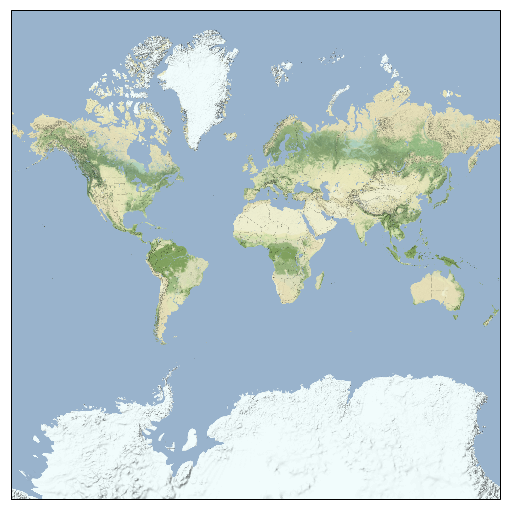

In [18]:
ln.__make_plots__(cubes, "/scratch/liz/Test/", colourmap='magma', colourbar_label='Sulphur dioxide', markerpoint=(41.7, 13.366667, 'Nabro'), plottitle='Random title')



In [9]:
print(a)

v / (g/m3)                          (height: 7; time: 1; latitude: 400; longitude: 1050)
     Dimension coordinates:
          height                           x        -            -               -
          time                             -        x            -               -
          latitude                         -        -            x               -
          longitude                        -        -            -               x
     Attributes:
          EndofRelease: 0000UTC 11/07/2011
          ForecastDuration: 674 hours
          MetData: NWP Flow.Global_PT1_flow; NWP Flow.Global_PT2_flow
          ReleaseHeight: Multiple Sources
          ReleaseLocation: Multiple Sources
          ReleaseRate: Multiple Sources
          RunTime: 1456UTC 07/06/2018
          StartofRelease: 2230UTC 12/06/2011
          Title: nabro
          category: CHEMISTRY-SPECIES
          quantity: Air Concentration
          species: SULPHUR-DIOXIDE
          time: 1200 19/06/11
          

In [10]:
cubelist1 = ln.load_uniform_cubes(filepaths, add_coord=('Z_plus_Z_averaging', 7, 10, 'height'), aggregate='height', subset=(-18,110,0,50), masking=0.0001)

In [11]:
ln.make_plots(cubelist1, '/scratch/liz/Test')

DuplicateDataError: failed to merge into a single cube.
  Duplicate 'v' cube, with scalar coordinates 